In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "../capture24"
# i = 132
# df = pd.read_csv(f'{path}/P{i+1:03d}.csv.gz', compression='gzip', low_memory=False)
# df.shape

In [3]:
def create_windows_np(data, window_size, stride):
    num_samples, num_channels = data.shape
    num_windows = (num_samples - window_size) // stride + 1

    shape = (num_windows, window_size, num_channels)
    strides = (data.strides[0] * stride, data.strides[0], data.strides[1])

    windows = np.lib.stride_tricks.as_strided(data, shape=shape, strides=strides)

    # transpose the windows array to the desired shape
    # windows = np.transpose(windows, axes=(0, 2, 1))

    return windows

In [3]:
df_all = pd.DataFrame({'x': [], 'y': [], 'z': [], 'user_id': []})  # add a 'user_id' column to the DataFrame
for i in range(20):
    user_id = f'P{i+1:03d}'  # set the user ID for this iteration
    df = pd.read_csv(f'{path}/{user_id}.csv.gz', compression='gzip', low_memory=False)
    df = df.drop(columns=['annotation'])
    # convert the 'time' column to a datetime object
    df['time'] = pd.to_datetime(df['time'], origin='unix')
    # set the 'time' column as the DataFrame index
    df.set_index('time', inplace=True)
    # resample the DataFrame from 100 Hz to 50 Hz
    df = df.resample('20ms').mean()
    df = df.reset_index().reset_index(drop=True)
    df['user_id'] = i+1  # set the user ID for this DataFrame
    df_all = pd.concat([df_all, df.loc[:df.shape[0] - df.shape[0] % 100 - 1]])
    print(f'{user_id}: {df.shape[0]}')
    del df

# reset the index of the df_all DataFrame
df_all = df_all.reset_index(drop=True)

# save the df_all DataFrame to a Feather file
df_all.to_feather(f'{path}/training.feather')
del df_all

P001: 5010001
P002: 4410001
P003: 4860001
P004: 3895893
P005: 4950001
P006: 5715001
P007: 5040001
P008: 5130001
P009: 3653926
P010: 4590001
P011: 4860001
P012: 4725001
P013: 4230801
P014: 4995001
P015: 4680001
P016: 4617001
P017: 5040001
P018: 4455001
P019: 4785001
P020: 3960001


In [5]:
df_feather = pd.read_feather(f'{path}/training.feather')
df_feather.head()

,x,y,z,user_id,time
0,-0.46669,-0.533341,0.658472,1.0,2016-11-13 02:18:00.000
1,-0.46669,-0.533341,0.658472,1.0,2016-11-13 02:18:00.020
2,-0.46669,-0.533341,0.658472,1.0,2016-11-13 02:18:00.040
3,-0.46669,-0.541122,0.658472,1.0,2016-11-13 02:18:00.060
4,-0.46669,-0.541122,0.658472,1.0,2016-11-13 02:18:00.080


In [23]:
del df_feather

In [8]:
windows = create_windows_np(df.drop(columns=['time', 'annotation']).values, 100, 50)
windows[-1]

array([[ 0.04312329, -0.98836136, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.04312329, -0.98836136, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.05884642, -0.97270644, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.05884642, -0.97270644, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.05884642, -0.97270644, -0.20271571],
       [ 0.05884642, -0.98836136, -0.20271571],
       [ 0.05884642, -0.97270644, -0.20271571],
       [ 0.05884642, -0.97270644, -0.20271571],
       [ 0.05884642, -0.98836136, -0.202

In [9]:
df.loc[df.shape[0]-1]

time          2016-12-20 04:51:00.000000
x                               0.058846
y                              -0.972706
z                              -0.202716
annotation        7030 sleeping;MET 0.95
Name: 10500000, dtype: object

In [3]:
df_copy = df.copy()

# convert the 'time' column to a datetime object
df_copy['time'] = pd.to_datetime(df_copy['time'], origin='unix')

# set the 'time' column as the DataFrame index
df_copy.set_index('time', inplace=True)

# resample the DataFrame from 100 Hz to 50 Hz
df_resampled = df_copy.drop(columns=['annotation']).resample('20ms').mean()

df_resampled.shape

(5010001, 3)

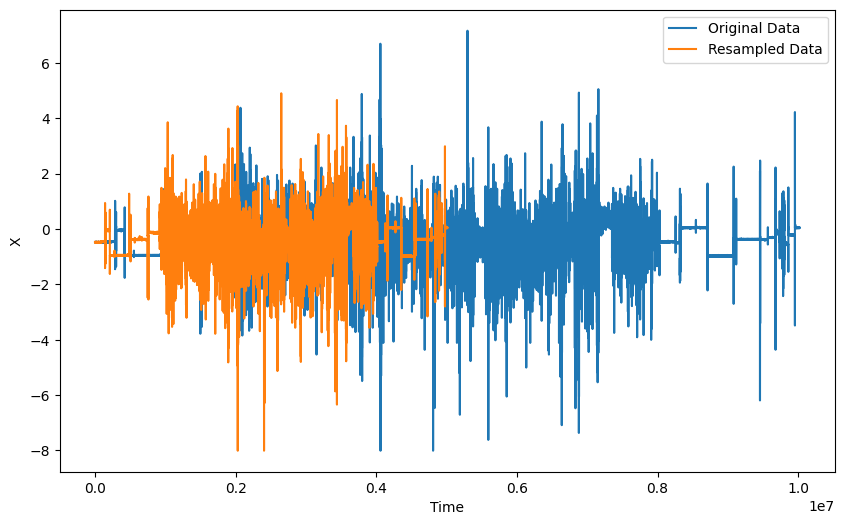

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(df)+1), df['x'], label='Original Data')
ax.plot(range(1, len(df_resampled)+1), df_resampled['x'], label='Resampled Data')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('X')
plt.show()

In [5]:
# df_empty = pd.DataFrame({'Time' : [], 'x': [], 'y': [], 'z': []})
# for i in range(10):
#     df = pd.read_csv(f'{path}/P{i+1:03d}.csv.gz', compression='gzip', low_memory=False)
#     df_empty.concat(df)

In [13]:
def create_windows_np(data, window_size, stride):
    num_samples, num_channels = data.shape
    num_windows = (num_samples - window_size) // stride + 1

    shape = (num_windows, window_size, num_channels)
    strides = (data.strides[0] * stride, data.strides[0], data.strides[1])

    windows = np.lib.stride_tricks.as_strided(data, shape=shape, strides=strides)

    # transpose the windows array to the desired shape
    windows = np.transpose(windows, axes=(0, 2, 1))

    return windows

In [14]:
windows =  create_windows_np(df_resampled.values, 100, 50)

In [17]:
windows.shape
windows[0][0]

array([-0.46669036, -0.46669036, -0.46669036, -0.46669036, -0.46669036,
       -0.4823338 , -0.4823338 , -0.47451208, -0.46669036, -0.46669036,
       -0.46669036, -0.46669036, -0.46669036, -0.46669036, -0.46669036,
       -0.46669036, -0.46669036, -0.46669036, -0.46669036, -0.46669036,
       -0.46669036, -0.46669036, -0.46669036, -0.46669036, -0.46669036,
       -0.46669036, -0.46669036, -0.46669036, -0.46669036, -0.46669036,
       -0.46669036, -0.46669036, -0.46669036, -0.46669036, -0.46669036,
       -0.47451208, -0.46669036, -0.46669036, -0.46669036, -0.46669036,
       -0.46669036, -0.46669036, -0.46669036, -0.46669036, -0.46669036,
       -0.46669036, -0.46669036, -0.46669036, -0.46669036, -0.46669036,
       -0.46669036, -0.46669036, -0.46669036, -0.46669036, -0.46669036,
       -0.46669036, -0.46669036, -0.46669036, -0.46669036, -0.46669036,
       -0.46669036, -0.46669036, -0.46669036, -0.46669036, -0.46669036,
       -0.46669036, -0.46669036, -0.46669036, -0.46669036, -0.46

In [3]:
path = "../capture24"
df = pd.read_feather(f'{path}/training.feather', columns=['x', 'y', 'z', 'user_id'])

In [26]:
df.loc[df['user_id']==17].isna().sum()

x          180000
y          180000
z          180000
user_id         0
dtype: int64